In [11]:
import pynbody
import numpy as np
import array
import math

In [4]:
import pynbody.plot.sph as sph

In [12]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
def traceThing(path, index, interval, nsteps): 
    #tracing function
    #How this works: out files are in form [path]/[name].000005
    #path is a string: give it '[path]/[name]'. Note that path is wrt current folder.
    #for example, if in the same folder as target outputs, just give this function [name]
    #index should be an integer: its how we pull a specific particle out of the pynbody file.
    #interval is the step difference between outputs: give it an integer corresponding to that (i.e. 5)
    #nsteps should be less than or equal to the total number of steps in the simulation. 
    #Would expect an integer, but takes any kind of number.
    #this function returns the location of the given particle at each output file.
    part=[]
    t=interval
    while (t <= nsteps):
        s=pynbody.load(path+'.'+str(t).zfill(6))
        s.physical_units()
        part.append([s.gas['x'][index],s.gas['y'][index],s.gas['z'][index]])
        t+=interval
    return part #should be array of 3tuples.

def radialIndexFinder(path,rmin,rmax):
    #produces list of indices of particles that are between radii rmin and rmax.
    #helper function for spiralFinder.
    i=0
    l=[] #empty list
    s=pynbody.load(path)
    s.physical_units()
    k=s.gas['pos']
    for p in k:
        if(rmin<=np.linalg.norm(p)<=rmax):
            l.append(i)
        i+=1
    return l

def maxDensity(path, ring, nSec): #returns indices of particles in ring.
    #helper function for spiralFinder
    i=0.0
    theta=2*math.pi/nSec
    s=pynbody.load(path)
    ray= [[]]*nSec #create list of nSec empty lists. This way makes it so that initializ
    x=0
    for x in range(nSec): #cycles through each each empty list.
        for l in ring: #adds indices of particles in a specific sector into corresponding array space.
            if i<= np.arctan2(s.gas['x'][l],s.gas['y'][l]) <i+theta:
                ray[x].append(l)
        i+=theta
    x=0 #keeps track of current index
    xm=0 #keeps track of index of longest list
    z=len(ray[0]) #z is value of longest list
    for k in ray: #goes through newly filled lists, and picks the longest one.
        if len(k) > z:
            z=len(k)
            xm=x
        x+=1
    return [[xm*theta,(xm+1)*theta],ray[xm]] #returns the angle sector and the longest list of indices.
#considering changing to just longest list of indices to match 

def spiralFinder(path,rmin,rmax,nSec):
    #finds highest density slice in an area. Hopefully should pick out spiral arms. likely error prone.
    #Someone vulnerable to thresholds due to particle drift.
    k=radialIndexFinder(path,rmin,rmax)
    return maxDensity(path,k,nSec)[1] #returns list of indices 

def sectorFinder(path,xmin,xmax,ymin,ymax): 
    #picks out particles in a given square. potentially change this to respect 3space.
    s=pynbody.load(path)
    s.physical_units()
    k=s.gas['pos']
    l=[]
    i=0 #index tracker
    for p in k:
        if (xmin<=p[0]<xmax and ymin<=p[1]<ymax):
            l.append(i)
        i+=1
    return l

SimArray([[ 900.6859 ,  900.3761 ,  900.06635, ..., 1441.1473 ,
           1441.7748 , 1442.4021 ],
          [ 897.1954 ,  896.8869 ,  896.5785 , ..., 1435.5092 ,
           1436.0848 , 1436.6606 ],
          [ 893.7047 ,  893.39764,  893.0906 , ..., 1429.871  ,
           1430.395  , 1430.9191 ],
          ...,
          [ 402.95044,  403.11877,  403.28705, ...,  817.3901 ,
            817.7879 ,  818.1856 ],
          [ 402.95047,  403.09583,  403.24115, ...,  817.1577 ,
            817.5499 ,  817.9421 ],
          [ 402.95047,  403.07288,  403.19525, ...,  816.9254 ,
            817.31195,  817.6985 ]], dtype=float32, 'Msol kpc**-3')

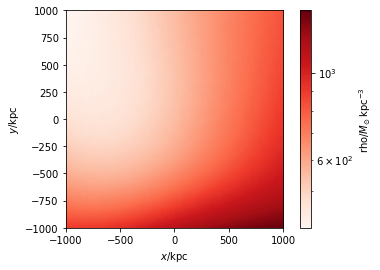

In [37]:
s = pynbody.load('writeTest/withGas/protenCor.000755')
s.physical_units()
sph.image(s.s,width=2000,cmap='Reds')

In [10]:
k=radialIndexFinder('expDist/expDist.001000',9,10)
lischt = maxDensity('expDist/expDist.001000',k,100)


In [106]:
#non-function version of the finder.

t=1
part=[]
while (t <= 100):
    s=pynbody.load('expDist2/expDist.00'+str(t).zfill(4))
    s.physical_units()
    part.append([s.gas['x'][0],s.gas['y'][0],s.gas['z'][0]])
    t+=1


[[-29.910686492919922, -12.221795082092285, 8.52682113647461],
 [-29.744314193725586, -12.518341064453125, 8.51465129852295],
 [-29.549837112426758, -12.802373886108398, 8.495025634765625],
 [-29.329681396484375, -13.074926376342773, 8.467438697814941],
 [-29.082210540771484, -13.335164070129395, 8.432422637939453],
 [-28.807519912719727, -13.582987785339355, 8.390453338623047],
 [-28.50347900390625, -13.816088676452637, 8.342201232910156],
 [-28.17255210876465, -14.035008430480957, 8.286002159118652],
 [-27.815319061279297, -14.239924430847168, 8.222201347351074],
 [-27.4321346282959, -14.430902481079102, 8.150256156921387],
 [-27.022680282592773, -14.607076644897461, 8.069918632507324],
 [-26.58662223815918, -14.767804145812988, 7.980336666107178],
 [-26.123842239379883, -14.913877487182617, 7.882472038269043],
 [-25.636205673217773, -15.046393394470215, 7.776400089263916],
 [-25.122573852539062, -15.163614273071289, 7.662332534790039],
 [-24.582765579223633, -15.265131950378418, 7.5

In [22]:
part=traceThing('writeTest/withGas/protenCor',1,5,725)

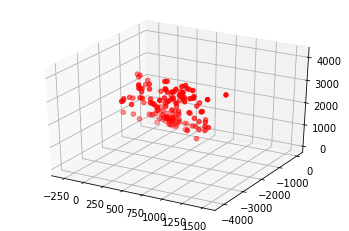

In [25]:
x=[[]]*len(part)
y=[[]]*len(part)
z=[[]]*len(part)
for n in range(len(part)):
    x[n]=part[n][0]
    y[n]=part[n][1]
    z[n]=part[n][2]
fig =plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(x,y,z,c='r', marker='o')
plt.show()

In [24]:
part

[[21.491701126098633, -1.8483316898345947, 20.569557189941406],
 [-14.358948707580566, 13.214696884155273, 37.4700927734375],
 [-16.00942039489746, 34.43162155151367, 49.19142532348633],
 [82.99152374267578, -107.46482849121094, 88.47564697265625],
 [143.45526123046875, -158.21780395507812, 366.62371826171875],
 [-140.0161590576172, -230.42445373535156, 204.78343200683594],
 [240.88458251953125, -225.20492553710938, 114.46588134765625],
 [65.30745697021484, -89.5589828491211, 180.23638916015625],
 [13.560394287109375, 17.302196502685547, 225.31666564941406],
 [-21.303691864013672, 40.61447525024414, 254.57212829589844],
 [41.993927001953125, -52.47370147705078, 322.39007568359375],
 [217.3153533935547, -157.96090698242188, 366.25982666015625],
 [203.83355712890625, 18.59937286376953, 243.81069946289062],
 [132.79689025878906, -226.982666015625, 256.9837646484375],
 [-14.599753379821777, -148.8345947265625, 410.2536926269531],
 [69.6954574584961, -232.97496032714844, 394.80755615234375]

SimArray([[ 77999.72 ,  73728.53 ,  69457.33 , ...,  33419.49 ,
            30459.275,  27499.062],
          [ 76416.57 ,  72241.36 ,  68066.15 , ...,  33230.445,
            30523.012,  27815.576],
          [ 74833.42 ,  70754.19 ,  66674.95 , ...,  33041.4  ,
            30586.746,  28132.09 ],
          ...,
          [145433.56 , 141064.72 , 136695.86 , ..., 118246.08 ,
           120051.19 , 121856.3  ],
          [148763.66 , 144157.77 , 139551.86 , ..., 110098.78 ,
           111841.97 , 113585.15 ],
          [152093.77 , 147250.81 , 142407.86 , ..., 101951.49 ,
           103632.74 , 105314.   ]], dtype=float32, 'Msol kpc**-3')

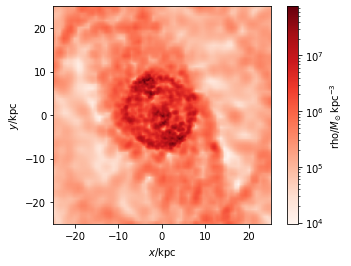

In [92]:
pynbody.analysis.angmom.faceon(s)
sph.image(s.g,width=50,cmap='Reds')

In [44]:
pynbody.analysis.angmom.sideon(s.d)
sph.image(s.dm,width=10000,qty='rho')

ValueError: Insufficient particles around center to get velocity

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


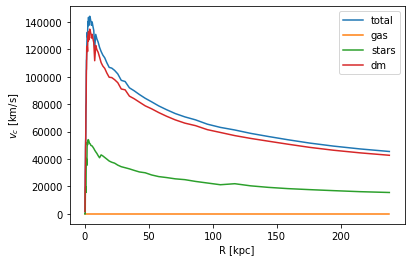

In [38]:
s.physical_units()
p = pynbody.analysis.profile.Profile(s,min=.01,max=250,type='log',ndim=3)
pg = pynbody.analysis.profile.Profile(s.g,min=.01,max=250,type='log',ndim=3)
ps = pynbody.analysis.profile.Profile(s.s,min=.01,max=250,type='log',ndim=3)
pd = pynbody.analysis.profile.Profile(s.d,min=.01,max=250,type='log',ndim=3)

# make the plot
plt.plot(p['rbins'],p['v_circ'],label='total')
plt.plot(pg['rbins'],pg['v_circ'],label='gas')
plt.plot(ps['rbins'],ps['v_circ'],label='stars')
plt.plot(pd['rbins'],pd['v_circ'],label='dm')

plt.xlabel('R [kpc]')
plt.ylabel(r'$v_c$ [km/s]')
plt.legend()

In [15]:
s.dm

<SimSnap "noahDistribution/noahgasnostars/noahgasnostars.000100::dm" len=200000>